In [1]:
import gene_inference_utils as utils
import numpy as np
import matplotlib.pyplot as plt
import torch

## GAT

In [2]:
# In this notebook, all nine target genes are trainied on a different graph model contains GAT graph layes

# load gene name and connections
gene_name = np.loadtxt('gene_name.txt', dtype=str)
gene_edge = np.loadtxt('gene_edge.txt', dtype=str)
gene_edge_new = np.loadtxt('full_network.txt', dtype=str)

# create name-index mapping
node_map = utils.node_mapping(gene_name)

# define training and validating file
train_file = 'input_train_cat.csv'
validate_file = 'input_test_cat.csv'

# target genes to inference
target = ["App", "Apoe", "Gusb","Lamp5","Mbp","Pvalb","S100b","Slc30a3","Snca"]

# deired model to be trianed
model_name = 'GAT'

In [ ]:
res = utils.multiSingleTrain(model_name, train_file, validate_file, node_map, gene_edge_new, target)

In [4]:
# number of epochs that each gene used to finish the training 
for i in range(9):
    l = len(res[i])
    print(l)

33
29
24
32
61
15
70
70
38


In [5]:
# mse for 9 target genes, order corresponding to that in target list
for i in range(9):
    mse = res[i][-1]
    print(mse)

2.5699056727113145e-07
8.725484215253863e-06
3.260637586803869e-09
4.87191959614503e-07
5.774979912825323e-07
1.9748655964867288e-07
1.7027332128376976e-08
1.2357653409826122e-08
7.825209349634734e-07


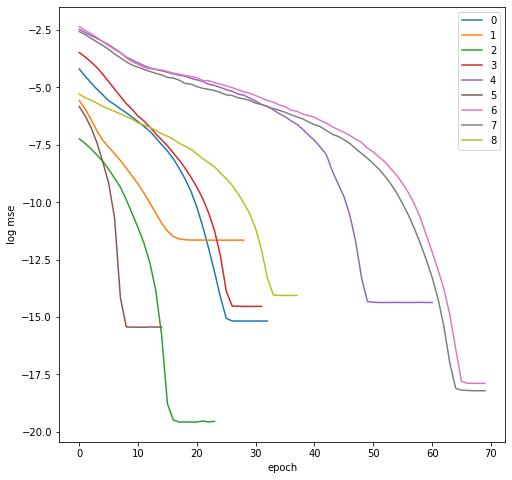

In [6]:
plt.figure(figsize=(8, 8))
for i in range(9): 
    ep = [j for j in range(len(res[i]))]
    plt.plot(ep, np.log(res[i]), label=str(i))
plt.legend()
plt.xlabel('epoch')
plt.ylabel('log mse')
plt.show()